# **Insurance Cost Analysis**

This project involves conducting data cleaning, exploratory data analysis (EDA), and regression modeling on a health insurance dataset with the parameters listed below.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

### Objectives 
In this project, you will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 

### 📋 Table of Contents

1 - [**Import the Dataset**](#1---import-the-dataset)  

2 - [**Data Wrangling**](#2---data-wrangling)  

3 - [**Exploratory Data Analysis (EDA)**](#3---exploratory-data-analysis-eda)  

4 - [**Model Development**](#4---model-development)  

5 - [**Model Refinement**](#5---model-refinement)

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## 1 - Import the dataset

In [2]:
# Load the dataset into a pandas DataFrame (no header row in the CSV)
df = pd.read_csv("medical_insurance_dataset.csv", header=None)

In [3]:
# Display the first 10 rows of the dataset
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [4]:
# Assign column names to the dataset
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers

In [5]:
# Verify that column names were assigned correctly
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [6]:
# Replace all '?' entries with NaN to mark them as missing values
df.replace("?", np.NaN, inplace = True)

## 2 - Data Wrangling

In [7]:
# Display concise summary of the DataFrame (column names, non-null counts, and data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [8]:
# Calculate the mode (most frequent value) for the 'smoker' column.
mode = df["smoker"].mode()[0]
# Fill missing 'smoker' values using the calculated mode.
df["smoker"].replace(np.nan, mode, inplace=True)

# Calculate the mean for the 'age' column.
mean_age = df["age"].astype(float).mean()
# Fill missing 'age' values using the calculated mean.
df["age"].replace(np.nan, mean_age, inplace=True)

# Convert the 'smoker' and 'age' columns to integer type now that missing values are handled.
df[["smoker", "age"]] = df[["smoker", "age"]].astype("int")

# Display the DataFrame summary to verify the changes (non-null counts and dtypes).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


/var/folders/l2/gkctqlxn0397j6v86h0f_9080000gn/T/ipykernel_99068/3889588243.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["smoker"].replace(np.nan, mode, inplace=True)
/var/folders/l2/gkctqlxn0397j6v86h0f_9080000gn/T/ipykernel_99068/3889588243.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [9]:
# Round the values in the 'charges' column to two decimal places for cleaner presentation.
df["charges"] = np.round(df["charges"], 2)

# Display the first 5 rows of the DataFrame to verify that the rounding was applied correctly.
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


## 3 - Exploratory Data Analysis (EDA)

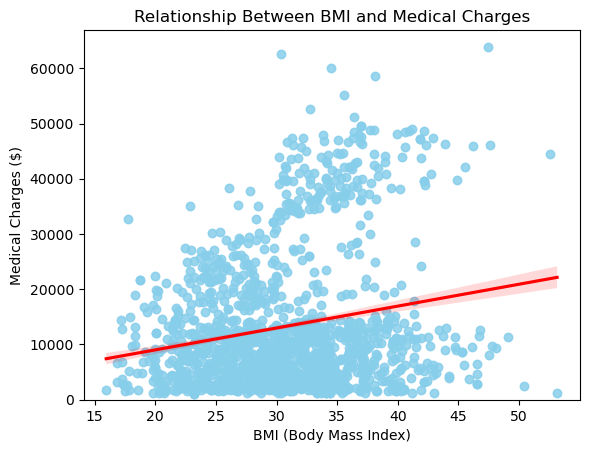

In [10]:
# Create a regression plot to visualize the relationship and linear fit between BMI and medical charges.
sns.regplot(
    x="bmi",            # Feature for the x-axis.
    y="charges",        # Feature for the y-axis.
    data=df,            # The DataFrame containing the data.
    scatter_kws={"color": "skyblue", "alpha": 0.6},  # Customize the appearance of the scatter plot points.
    line_kws={"color": "red"}                       # Customize the color of the fitted regression line.
)

# Adjust plot details for better clarity and context.
plt.ylim(0,)  # Set the lower y-axis limit to 0, as charges can't be negative.
plt.title("Relationship Between BMI and Medical Charges")
plt.xlabel("BMI (Body Mass Index)")
plt.ylabel("Medical Charges ($)")

# Render and display the final plot.
plt.show()

/var/folders/l2/gkctqlxn0397j6v86h0f_9080000gn/T/ipykernel_99068/3147546964.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


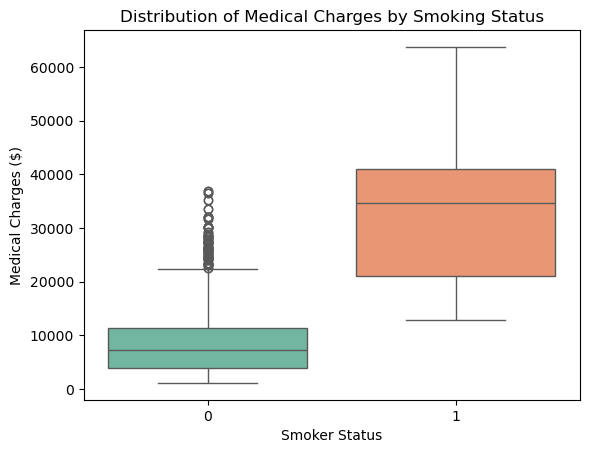

In [11]:
# Create a boxplot to visually compare the distribution of medical charges between smokers and non-smokers.
sns.boxplot(
    x="smoker",         # The categorical variable for the x-axis.
    y="charges",        # The numerical variable for the y-axis whose distribution is shown.
    data=df,            # The DataFrame containing the data.
    palette="Set2"      # Apply a specific color palette for better visuals.
)

# Add a title and axis labels to make the plot clear and informative.
plt.title("Distribution of Medical Charges by Smoking Status")
plt.xlabel("Smoker Status")
plt.ylabel("Medical Charges ($)")

# Render and display the plot.
plt.show()

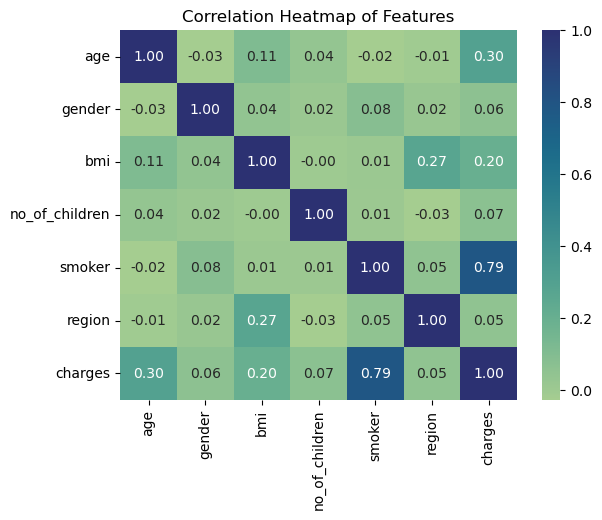

In [12]:
# First, calculate the pairwise correlation matrix for all numerical columns in the DataFrame.
corr_matrix = df.corr()

# Create a heatmap using the Seaborn library to visualize the correlation matrix.
sns.heatmap(
    corr_matrix,         # The data to plot (our correlation matrix).
    annot=True,          # Write the data value in each cell of the heatmap.
    cmap="crest",        # Use the "crest" color palette for styling.
    fmt=".2f"            # Format the annotations to show values with two decimal places.
)

# Add a descriptive title to the plot.
plt.title("Correlation Heatmap of Features")

# Display the final plot.
plt.show()

## 4 - Model Development

In [13]:
# Define feature (X) and target (Y)
X = df[['smoker']] # Using [['...']] keeps it a DataFrame
Y = df['charges']

# Initialize and train the model
lm = LinearRegression()
lm.fit(X, Y)

# Evaluate the model and print the R² score
r2_simple = lm.score(X, Y)
print(f"R² Score: {r2_simple:.4f}")

R² Score: 0.6222


In [14]:
# Define the new feature set (Z) with multiple variables
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]

# Train the model using the expanded feature set
lm.fit(Z, Y)

# Evaluate the new model and print the formatted R² score
r2_multiple = lm.score(Z, Y)
print(f"R² score with multiple features: {r2_multiple:.4f}")

R² score with multiple features: 0.7504


In [15]:
# Define a processing and modeling pipeline with three steps
pipe = Pipeline([
    # Step 1: Create polynomial features to capture non-linear relationships in the data.
    ("polynomial", PolynomialFeatures(degree=2, include_bias=False)),
    
    # Step 2: Scale the features to a standard range, which helps the model's performance.
    ("scaler", StandardScaler()),
    
    # Step 3: Define the final regression model that will be trained on the processed data.
    ("model", LinearRegression())
])

# Train the entire pipeline using the feature set 'Z' and target 'Y'.
pipe.fit(Z, Y)

# Use the trained pipeline to make predictions on the original feature set 'Z'.
ypipe = pipe.predict(Z)

# Calculate the R-squared score to evaluate the pipeline's performance.
# Note: The correct argument order is r2_score(true_values, predicted_values).
r2_from_pipeline = r2_score(Y, ypipe)

# Print the formatted R-squared score for clear and readable output.
print(f"Pipeline Model R² Score: {r2_from_pipeline:.4f}")

Pipeline Model R² Score: 0.8452


## 5 - Model Refinement

In [16]:
# Split data into 80% train / 20% test, setting a random_state for reproducible results.
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1) 

In [17]:
# Initialize the Ridge regression model, setting the regularization strength alpha to 0.1.
ridge = Ridge(alpha=0.1)

# Train (fit) the model using the training data (x_train, y_train).
ridge.fit(x_train, y_train)

# Evaluate the model's performance (R-squared score) on the unseen test data.
test_score = ridge.score(x_test, y_test)

# Print the formatted R-squared score for the test set.
print(f"Ridge Model R² Score on Test Set: {test_score:.4f}")

Ridge Model R² Score on Test Set: 0.6761


In [18]:
# Initialize the transformer to create 2nd-degree polynomial features.
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit to the training data and transform it into polynomial features.
x_train_poly = poly.fit_transform(x_train)

# Use the same fitted transformer to transform the test data. 
# We only use .transform() here to prevent data leakage from the test set.
x_test_poly = poly.transform(x_test)

# Re-train the Ridge model, this time on the new polynomial training features.
ridge.fit(x_train_poly, y_train)

# Evaluate the model's performance on the transformed polynomial test features.
score_poly = ridge.score(x_test_poly, y_test)

# Print the formatted R-squared score.
print(f"Ridge with Polynomial Features R² Score: {score_poly:.4f}")

Ridge with Polynomial Features R² Score: 0.7836
